In [1]:
%matplotlib inline
from datetime import datetime, timedelta
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import exp

cr = 10.0
isf = 50.0
dia = 6 * 60.0

In [2]:
def scalable_exp_iob(t, tp, td):
    tau = tp*(1-tp/td)/(1-2*tp/td)
    a = 2*tau/td
    S = 1/(1-a+(1+a)*exp(-td/tau))
    return 1-S*(1-a)*((pow(t,2)/(tau*td*(1-a)) - t/tau - 1)*exp(-t/tau)+1)

def carb_effect(t):
    carbs = 50.0
    duration = 6 * 60.0
    return (carbs / duration * t) / cr * isf

dose = 5.0


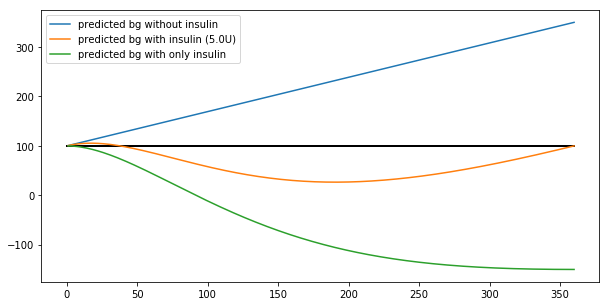

In [9]:

td = dia
tp = 75.0

starting_bg = 100.0
target = 100.0

plt.figure(figsize=(10,5))
plt.plot([0,dia], [target, target], color='k', linestyle='-', linewidth=2)

x = np.linspace(1,int(td),num=int(td))

eventual_bg = starting_bg + carb_effect(dia)
dose = (eventual_bg - target) / isf
print "dose = %0.1f" % dose

y = np.array([starting_bg + carb_effect(t) for t in x])
plt.plot(x, y, label="predicted bg without insulin")

y = np.array([starting_bg + carb_effect(t) - (1 - scalable_exp_iob(t, tp, td)) * dose * isf for t in x])
plt.plot(x, y, label="predicted bg with insulin (%0.1fU)" % dose)

y = np.array([starting_bg - (1 - scalable_exp_iob(t, tp, td)) * dose * isf for t in x])
plt.plot(x, y, label="predicted bg with only insulin")

plt.legend(loc='upper left')
plt.show()

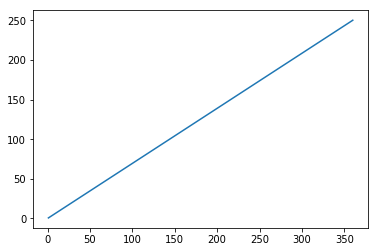

In [10]:
y = np.array([(starting_bg + carb_effect(t)) - target for t in x])
plt.plot(x, y, label="new suggest")
plt.show()


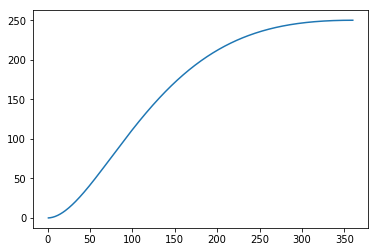

In [5]:
y = np.array([((1 - scalable_exp_iob(t, tp, td)) * dose) * isf for t in x])
plt.plot(x, y, label="new suggest")


updated_dose = 3.0


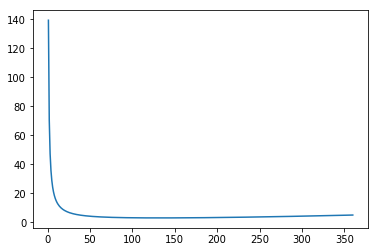

In [6]:
def new_suggest(t):
    predicted = starting_bg + carb_effect(t)
    return (predicted - target) / ((1 - scalable_exp_iob(t, tp, td)) * isf)

y = np.array([new_suggest(t) for t in x])
plt.plot(x, y, label="new suggest")
updated_dose = y.min()
print "updated_dose = %0.1f" % updated_dose

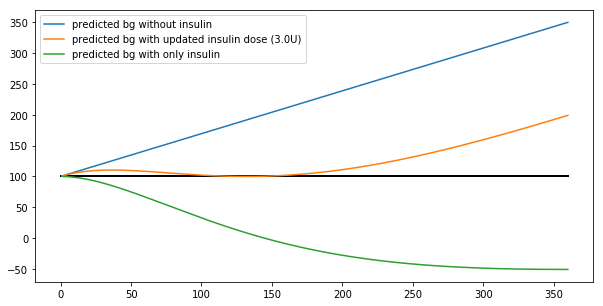

In [7]:

plt.figure(figsize=(10,5))
plt.plot([0,dia], [target, target], color='k', linestyle='-', linewidth=2)

y = np.array([starting_bg + carb_effect(t) for t in x])
plt.plot(x, y, label="predicted bg without insulin")

y = np.array([starting_bg + carb_effect(t) - (1 - scalable_exp_iob(t, tp, td)) * updated_dose * isf for t in x])
plt.plot(x, y, label="predicted bg with updated insulin dose (%0.1fU)" % updated_dose)

y = np.array([starting_bg - (1 - scalable_exp_iob(t, tp, td)) * updated_dose * isf for t in x])
plt.plot(x, y, label="predicted bg with only insulin")

plt.legend(loc='upper left')